# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.037048) Topic42_ec
2. Feature 17 (0.033617) Topic12_ec
3. Feature 82 (0.032417) Topic63_ic
4. Feature 7 (0.027311) Topic4_ec
5. Feature 83 (0.027201) Topic63_ec
6. Feature 68 (0.026342) Topic55_ic
7. Feature 16 (0.022423) Topic12_ic
8. Feature 63 (0.021408) Topic52_ec
9. Feature 6 (0.021141) Topic4_ic
10. Feature 66 (0.020496) Topic54_ic
11. Feature 61 (0.019596) Topic51_ec
12. Feature 21 (0.018260) Topic14_ec
13. Feature 18 (0.016618) Topic13_ic
14. Feature 29 (0.016377) Topic19_ec
15. Feature 70 (0.016308) Topic56_ic
16. Feature 69 (0.015769) Topic55_ec
17. Feature 19 (0.014716) Topic13_ec
18. Feature 67 (0.014566) Topic54_ec
19. Feature 28 (0.013183) Topic19_ic
20. Feature 57 (0.012934) Topic41_ec
21. Feature 71 (0.012930) Topic56_ec
22. Feature 4 (0.012927) Topic3_ic
23. Feature 135 (0.012672) Topic99_ec
24. Feature 15 (0.012324) Topic10_ec
25. Feature 20 (0.012292) Topic14_ic
26. Feature 9 (0.011895) Topic5_ec
27. Feature 175 (0.011315) Topic136_e

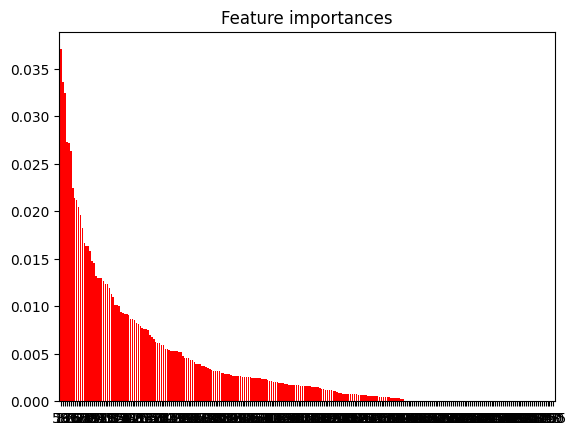

In [3]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024518) Topic4_ec
2. Feature 68 (0.023295) Topic55_ic
3. Feature 17 (0.022546) Topic12_ec
4. Feature 82 (0.022336) Topic63_ic
5. Feature 19 (0.022294) Topic13_ec
6. Feature 16 (0.021879) Topic12_ic
7. Feature 21 (0.021740) Topic14_ec
8. Feature 83 (0.020497) Topic63_ec
9. Feature 6 (0.020477) Topic4_ic
10. Feature 20 (0.020245) Topic14_ic
11. Feature 18 (0.020196) Topic13_ic
12. Feature 71 (0.019909) Topic56_ec
13. Feature 70 (0.018670) Topic56_ic
14. Feature 59 (0.018394) Topic42_ec
15. Feature 66 (0.017639) Topic54_ic
16. Feature 61 (0.016847) Topic51_ec
17. Feature 4 (0.016616) Topic3_ic
18. Feature 67 (0.016123) Topic54_ec
19. Feature 69 (0.016095) Topic55_ec
20. Feature 28 (0.014718) Topic19_ic
21. Feature 29 (0.014226) Topic19_ec
22. Feature 35 (0.012049) Topic24_ec
23. Feature 1 (0.011616) Topic1_ec
24. Feature 12 (0.011393) Topic9_ic
25. Feature 22 (0.011231) Topic15_ic
26. Feature 87 (0.011113) Topic65_ec
27. Feature 105 (0.010985) Topic74_ec
2

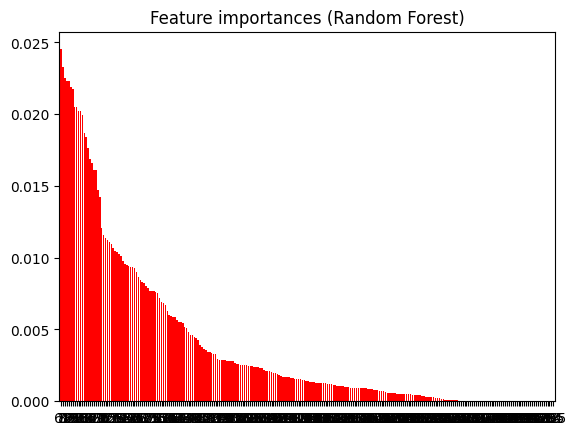

In [4]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.037048       0.018394
1         17       0.033617       0.022546
2         82       0.032417       0.022336
3          7       0.027311       0.024518
4         83       0.027201       0.020497
..       ...            ...            ...
251      217       0.000000       0.000000
252      218       0.000000       0.000000
253      219       0.000000       0.000000
254      220       0.000000       0.000006
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [6]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.006083123005378463 percentileRF: 0.00717073332548518


In [7]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.037048       0.018394
1        17       0.033617       0.022546
2        82       0.032417       0.022336
3         7       0.027311       0.024518
4        83       0.027201       0.020497
5        68       0.026342       0.023295
6        16       0.022423       0.021879
7        63       0.021408       0.009549
8         6       0.021141       0.020477
9        66       0.020496       0.017639
10       61       0.019596       0.016847
11       21       0.018260       0.021740
12       18       0.016618       0.020196
13       29       0.016377       0.014226
14       70       0.016308       0.018670
15       69       0.015769       0.016095
16       19       0.014716       0.022294
17       67       0.014566       0.016123
18       28       0.013183       0.014718
19       57       0.012934       0.010476
20       71       0.012930       0.019909
21        4       0.012927       0.016616
22    

In [8]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [9]:
len(X.columns)

43

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building

In [11]:
"""tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('dt', tree_clf), ('knn', knn_clf), ('svc', svm_clf)],
    voting='hard') # or soft voting, should try both

voting_clf.fit(X_train,y_train)

for clf in (tree_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))"""

'tree_clf = DecisionTreeClassifier()\nknn_clf = KNeighborsClassifier()\nsvm_clf = SVC(probability=True)\n\nvoting_clf = VotingClassifier(\n    estimators=[(\'dt\', tree_clf), (\'knn\', knn_clf), (\'svc\', svm_clf)],\n    voting=\'hard\') # or soft voting, should try both\n\nvoting_clf.fit(X_train,y_train)\n\nfor clf in (tree_clf, knn_clf, svm_clf, voting_clf):\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))\n\ny_pred = voting_clf.predict(X_test)\n\nprint("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))'

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize base classifiers
tree_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)  # Use Random Forest with 100 trees and parallel processing
knn_clf = KNeighborsClassifier(n_jobs=-1)
svm_clf = SVC(probability=True)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('tree', tree_clf), ('knn', knn_clf), ('svm', svm_clf)],
    voting='hard'
)

Voting Classifier Accuracy: 0.98525


In [ ]:
# Train the voting classifier
voting_clf.fit(X_train, y_train)

In [ ]:
for clf in (tree_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
# Make predictions
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

In [15]:
#save the model

import pickle

filename = 'voting_clf_model.sav'

pickle.dump(voting_clf, open(filename, 'wb'))

In [18]:
#load the model

loaded_model = pickle.load(open(filename , 'rb'))


# Test set

In [13]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

In [19]:
#prediction output like this
"""cookie_id,P1
300000,0.006936655528409391
300001,0.00527454177592661
300002,0.011525348288803432
300003,0.005810514691014177
300004,0.033702118420699805
300005,0.00527454177592661
300006,0.00527454177592661"""

X_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test = X_test.drop(X_test.columns.difference(X.columns), axis=1)

# target value should be a probability score between 0 and 1

y_pred = voting_clf.predict(X_test)

df_verseny_public_test['target'] = y_pred

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_prediction_ensemble_classifier.csv', index=False)